---

# 📊 Relatório de Análise de Vendas e Clientes

---

### 📝 1️⃣ Introdução e Preparação dos Dados

- Criamos uma cópia dos dados filtrados para análises gerais (`dados_vendas`).  
- Criamos outra cópia sem a coluna `id_anonimo` (`dados_sem_id_anonimo`) para análises como RFM, evitando redundância e simplificando o dataset.  

**Objetivo:** garantir que todas as análises sejam baseadas em **dados confiáveis**, sem duplicatas ou valores inconsistentes.

---

### 📈 2️⃣ Comparativo de Métricas

**💰 Valor total médio:**  
- Antes: `R$ XX.XX`  
- Depois: `R$ XX.XX`  
- Variação: `XX%` ✅

**📊 Mediana do valor total:**  
- Antes: `R$ XX.XX`  
- Depois: `R$ XX.XX`

**Objetivo:** identificar o impacto dos filtros nos dados e garantir métricas consistentes para análises subsequentes.

---

### 🔄 3️⃣ Análise RFM (Recência, Frequência, Monetário)

**Objetivo:** segmentar clientes com base no comportamento de compras.  

**Passos principais:**  
- Remover duplicatas e registros com dados nulos.  
- Filtrar apenas linhas com `quantidade > 0` e `preço > 0`.  
- Calcular **valor total por compra**.  
- Definir **data de referência** como última data de fatura para calcular recência.  
- Agrupar por cliente para obter:  
  - **Recência (dias desde a última compra)**  
  - **Frequência (número de compras)**  
  - **Monetário (valor total gasto)**  

**🏷️ Score RFM e Segmentação:**  
- Cada métrica recebe score de 1 a 4 com base em quartis.  
- Segmentos: `Melhores Clientes`, `Leais`, `Recém Chegados`, `Em Risco`, `Baixo Valor`, `Regulares`.  

**📊 Insights visuais:**  
- Gráfico de **Frequência x Monetário**, colorido por Recência.  
- Gráfico de barras mostrando a **distribuição de clientes por segmento**.

---

### 📅 4️⃣ Série Temporal de Vendas

- Agrupamos o **valor total das vendas por dia** para análise temporal.  
- Permite identificar **tendências, sazonalidade e picos de vendas**.

**💡 Observações:**  
- Tendências de aumento ou queda podem indicar períodos de promoção ou sazonalidade.  
- Ajuda a planejar estoque, marketing e estratégias comerciais.

---


---


In [512]:
# Carregando dados
import pandas as pd
dados = pd.read_csv('../raw/dados_verificados.csv')

In [513]:
# Mostrando as 5 primeiras linhas
dados.head()

,numero_fatura,codigo_produto,descricao,quantidade,data_fatura,preco_unitario,id_cliente,pais,valor_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [514]:
# Removendo dados nulos da coluna descrição

dados.dropna(subset=['descricao'], inplace=True)
dados.isnull().sum()

numero_fatura          0
codigo_produto         0
descricao              0
quantidade             0
data_fatura            0
preco_unitario         0
id_cliente        133583
pais                   0
valor_total            0
dtype: int64

In [515]:
# Verificando quais valores nulos estão presentes na coluna id_cliente
dados[dados['id_cliente'].isnull()]

,numero_fatura,codigo_produto,descricao,quantidade,data_fatura,preco_unitario,id_cliente,pais,valor_total
1407,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1408,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1409,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1410,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
1411,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94
...,...,...,...,...,...,...,...,...,...
536275,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65
536276,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52
536277,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96
536278,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79


In [516]:
# Criar uma coluna nova que indica se o id_cliente está nulo ou não
dados['id_anonimo'] = dados['id_cliente'].isnull()
dados.head()

,numero_fatura,codigo_produto,descricao,quantidade,data_fatura,preco_unitario,id_cliente,pais,valor_total,id_anonimo
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False


In [517]:
def processar_dados(dados):
    # Criar copia para não alterar o data original
    dados_processados = dados.copy()

    # Filtro principal: quantidade > 0
    mask_validos = (dados_processados['quantidade'] > 0) & (dados_processados['preco_unitario'] > 0)
    dados_processados = dados_processados[mask_validos]

    # Calucular o valor total
    dados_processados['valor_total'] = dados_processados['quantidade'] * dados_processados['preco_unitario']

    # Log de processamento
    registros_removidos = len(dados) - len(dados_processados)
    print(f"✅ Pré-processamento concluído:")
    print(f"   - Registros originais: {len(dados)}")
    print(f"   - Registros válidos: {len(dados_processados)}")
    print(f"   - Registros removidos: {registros_removidos}")
    print(f"   - Taxa de remoção: {registros_removidos/len(dados)*100:.2f}%")
    
    return dados_processados

In [518]:
# Aplicando a função de processamento
dados_filtrados = processar_dados(dados)

✅ Pré-processamento concluído:
   - Registros originais: 535187
   - Registros válidos: 524878
   - Registros removidos: 10309
   - Taxa de remoção: 1.93%


In [519]:
# Comparando métricas antes e depois do filtro
print("📈 Comparativo de métricas:")

# Antes do filtro (com valores problemáticos)
valor_total_antes = dados['quantidade'] * dados['preco_unitario']
media_antes = valor_total_antes.mean()
mediana_antes = valor_total_antes.median()

# Depois do filtro
media_depois = dados_filtrados['valor_total'].mean()
mediana_depois = dados_filtrados['valor_total'].median()

print(f"💰 Valor total médio:")
print(f"   Antes: R$ {media_antes:.2f}")
print(f"   Depois: R$ {media_depois:.2f}")
print(f"   Variação: {((media_depois - media_antes) / media_antes * 100):.2f}%")

print(f"\n📊 Mediana do valor total:")
print(f"   Antes: R$ {mediana_antes:.2f}")
print(f"   Depois: R$ {mediana_depois:.2f}")

📈 Comparativo de métricas:
💰 Valor total médio:
   Antes: R$ 18.17
   Depois: R$ 20.28
   Variação: 11.57%

📊 Mediana do valor total:
   Antes: R$ 9.90
   Depois: R$ 9.92


In [520]:
# Para análises gerais
dados_vendas = dados_filtrados.copy()


In [521]:
# criando uma copia sem id_anonimo
dados_sem_id_anonimo = dados_filtrados.copy()
dados_sem_id_anonimo.drop(columns=['id_anonimo'], inplace=True)


In [522]:
# Pipeline RFM
  # Importando bibliotecas
import pandas as pd
import numpy as np


In [523]:
# Garantido tipos
dados_sem_id_anonimo['data_fatura'] = pd.to_datetime(dados_sem_id_anonimo['data_fatura'], errors='coerce')


In [524]:
# Limpeza minima para RFM
rfm_base = (
    dados_sem_id_anonimo.drop_duplicates()
    .dropna(subset=['id_cliente', 'data_fatura'])
)

rfm_base = rfm_base[(rfm_base['quantidade'] > 0) & (rfm_base['preco_unitario'] > 0)]

In [525]:
# Valor monetario por linha
rfm_base = rfm_base.assign(valor_total = rfm_base['quantidade'] * rfm_base['preco_unitario'])

In [526]:
# Data de referência para cálculo de recência
ref_data = rfm_base['data_fatura'].max()

In [527]:
# Tabela agregada por cliente (R, F, M)
rfm = (
    rfm_base.groupby('id_cliente')
    .agg(
        Recencia_dias = ('data_fatura', lambda s: (ref_data - s.max()).days),
        Frequencia = ('data_fatura', 'nunique'),
        Monetario = ('valor_total', 'sum')
    )
    .reset_index()
)

In [528]:
# Score 1-4 (quartis): R invertido (quanto menos a recência, melhor)
def qscore(series, ascending=True):
    try:
        q = pd.qcut(series.rank(method='first'), 4, labels=[1,2,3,4])
    except ValueError:
        q = pd.series.cut(series.rank(method='first'), 4, labels=[1,2,3,4])
    q = q.astype(int)
    return q if ascending else 5 - q

In [529]:
# Atribuir scores 
rfm['R_Score'] = qscore(rfm['Recencia_dias'], ascending=False)
rfm['F_Score'] = qscore(rfm['Frequencia'],   ascending=True)
rfm['M_Score'] = qscore(rfm['Monetario'],    ascending=True)

In [530]:
# Criando coluna com score RFM concatenade somando os scores
rfm['RFM_Code'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Sum'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [531]:
# Regras simples de segmentação

def segment(row):
    if row['R_Score'] == 4 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Melhores Clientes'
    elif row['R_Score'] <= 2 and row['F_Score'] >=3 and row['M_Score'] >= 3:
        return 'Em Risco'
    elif row['R_Score'] == 4 and row['F_Score'] == 1:
        return 'Recém Chegados'
    elif row['RFM_Sum'] >=10:
        return 'Leais'
    elif row['RFM_Sum'] <= 5:
        return 'Baixo Valor'
    return 'Regulares'

rfm['Segmento'] = rfm.apply(segment, axis=1)

In [532]:
# Ordenando por importância
rfm['Segmento'] = rfm.apply(segment, axis=1)
rfm = rfm.sort_values(['Segmento', 'RFM_Sum', 'Monetario'], ascending=[True, False, False])

In [533]:
rfm.head(10)

,id_cliente,Recencia_dias,Frequencia,Monetario,R_Score,F_Score,M_Score,RFM_Code,RFM_Sum,Segmento
371,12818.0,261,1,1542.08,1,1,3,113,5,Baixo Valor
915,13572.0,205,1,1384.25,1,1,3,113,5,Baixo Valor
342,12770.0,210,1,1351.45,1,1,3,113,5,Baixo Valor
862,13501.0,287,1,1340.32,1,1,3,113,5,Baixo Valor
740,13328.0,315,1,1308.48,1,1,3,113,5,Baixo Valor
2070,15171.0,330,1,1289.50,1,1,3,113,5,Baixo Valor
1296,14105.0,238,1,1266.23,1,1,3,113,5,Baixo Valor
611,13151.0,295,1,1257.87,1,1,3,113,5,Baixo Valor
1936,15004.0,146,1,1220.77,1,1,3,113,5,Baixo Valor
341,12769.0,238,1,1143.60,1,1,3,113,5,Baixo Valor


In [534]:
rfm.to_csv('../raw/rfm_score.csv', index=False)

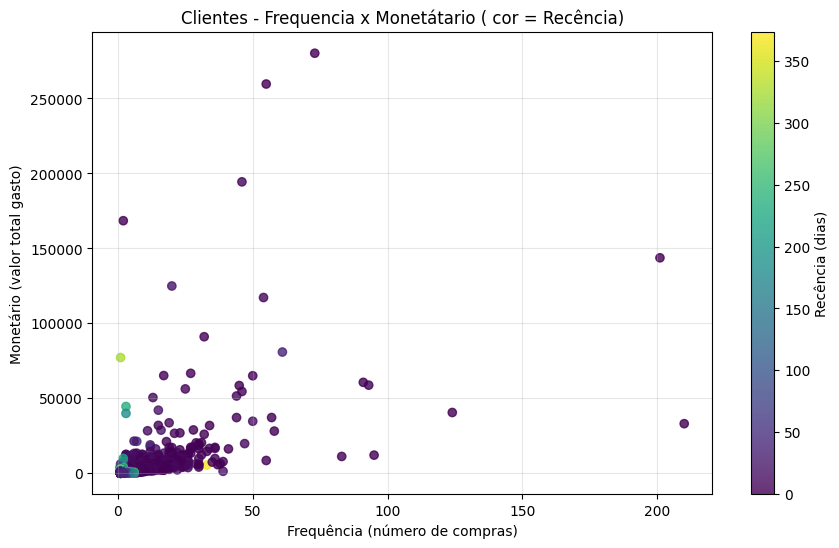

In [535]:
# Grafico F x M colorido por Recência

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sc = plt.scatter(
    rfm['Frequencia'],
    rfm['Monetario'],
    c=rfm['Recencia_dias'],
    cmap='viridis',
    alpha=0.8
)
plt.colorbar(sc, label='Recência (dias)')
plt.title('Clientes - Frequencia x Monetátario ( cor = Recência)')
plt.xlabel('Frequência (número de compras)')
plt.ylabel('Monetário (valor total gasto)')
plt.grid(alpha=0.3)

In [536]:
# Salvando figura
plt.savefig("../graficos/scatter_rfm.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Regulares'),
  Text(1, 0, 'Baixo Valor'),
  Text(2, 0, 'Melhores Clientes'),
  Text(3, 0, 'Em Risco'),
  Text(4, 0, 'Leais'),
  Text(5, 0, 'Recém Chegados')])

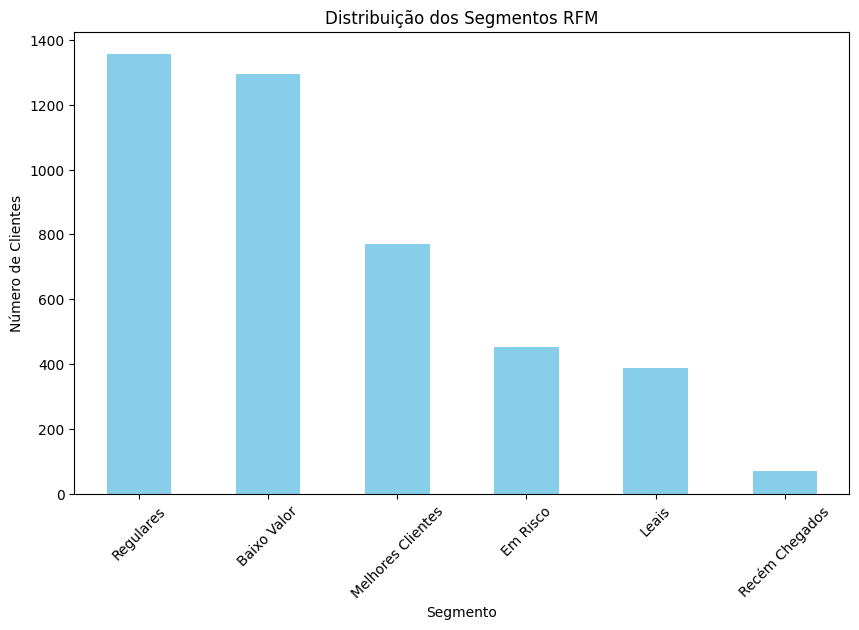

In [537]:
# Distribuição dos segmentos
plt.figure(figsize=(10,6))
rfm['Segmento'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribuição dos Segmentos RFM")
plt.xlabel("Segmento")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45)

In [538]:
# Salvar
plt.savefig("../graficos/segmentos_rfm.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [539]:
# garantir que é datetime
dados_vendas['data_fatura'] = pd.to_datetime(dados_vendas['data_fatura'])

In [540]:
# Preparando os dadoos para a serie temporal

# Agrupar vendas por dia

vendas_diarias = (
    dados_vendas.groupby(dados_vendas['data_fatura'].dt.date)['valor_total']
    .sum()
    .reset_index()
)


In [541]:
# Verificando os dados
print(vendas_diarias)

    data_fatura  valor_total
0    2010-12-01     58776.79
1    2010-12-02     47629.42
2    2010-12-03     46898.63
3    2010-12-05     31364.63
4    2010-12-06     54624.15
..          ...          ...
300  2011-12-05     88620.84
301  2011-12-06     56558.83
302  2011-12-07     75315.55
303  2011-12-08     82371.55
304  2011-12-09    200900.98

[305 rows x 2 columns]


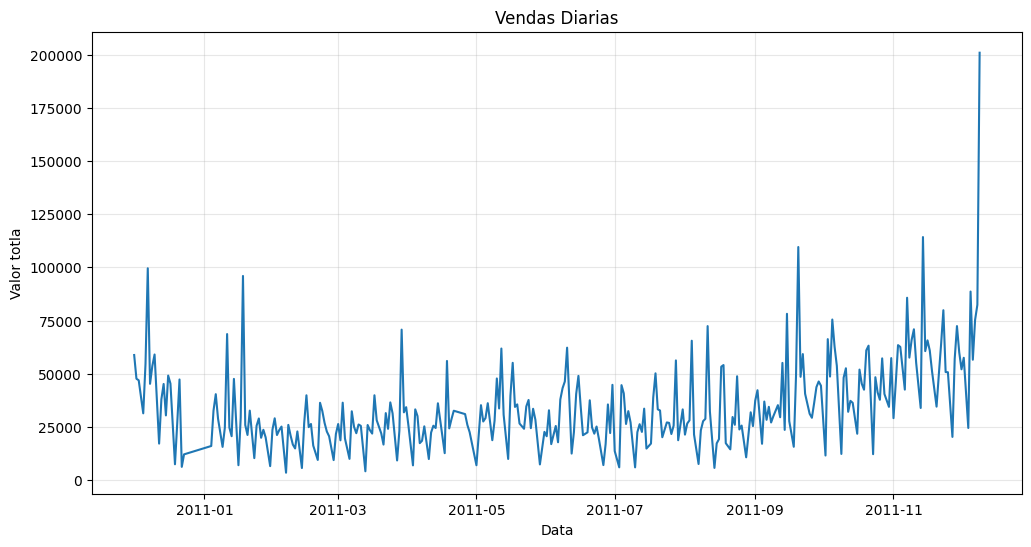

In [542]:
# Visualizando a série temporal

plt.figure(figsize=(12,6))
plt.plot(vendas_diarias['data_fatura'], vendas_diarias['valor_total'])
plt.title('Vendas Diarias')
plt.xlabel('Data')
plt.ylabel('Valor totla')
plt.grid(alpha=0.3)

# Salvando Grafico
plt.savefig("../graficos/serie_temporal.png", dpi=300, bbox_inches="tight")
plt.show()

In [543]:
# Análise de Qualidade dos Dados
print('Qualidade dos dados Prós-processamento')
print(f"Total de clientes analisados: {len(rfm)}")
print("Clientes por segmento:")
print(rfm['Segmento'].value_counts())
print(f"Vendas diarias analisadas: {len(vendas_diarias)} dias")
print(f"Período coberto: {vendas_diarias['data_fatura'].min()} a {vendas_diarias['data_fatura'].max()}")

Qualidade dos dados Prós-processamento
Total de clientes analisados: 4338
Clientes por segmento:
Segmento
Regulares            1357
Baixo Valor          1294
Melhores Clientes     772
Em Risco              454
Leais                 389
Recém Chegados         72
Name: count, dtype: int64
Vendas diarias analisadas: 305 dias
Período coberto: 2010-12-01 a 2011-12-09


In [544]:
# Salvando dados

dados.to_csv('../raw/dados_tratados.csv', index=False)